$$
M_{\phi}=\sqrt{\frac{-\text{Pm}-\text{Pp}+8 \pi ^2 \text{$\Delta $a} x^2+8 \pi ^2 \text{$\Delta $a} x \epsilon ^2-8 \pi ^2 \text{$\Delta $a} x}{x-1}}
$$

$$Pp = \text{gs1}^2 x^2 (-x+\epsilon +1)$$

$$Pm = \text{gp1}^2 x^2 (-x-\epsilon +1)$$

$$\epsilon = \frac{\text{mE}}{\text{m$\mu $}}$$


In [3]:
import csv
import numpy as np
from scipy.integrate import quad
from numpy import *
from scipy import *

import matplotlib as mpl
import matplotlib.pyplot as plt
linestyle_str = [
    ('solid', 'solid'),
    ('dotted', '.'),    
    ('dashed', '--'),  
    ('dashdot', '-.')] 
from matplotlib.pyplot import *
from  matplotlib import *
import mplhep as hep 
hep.style.use(hep.style.ATLAS)
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (9,6)
import matplotlib.patheffects as pe

In [8]:
import csv
import numpy as np
from scipy.integrate import quad

def integrand(x, mE, m_mu, delta_up, gp1, gs1):
    # Pre-calculando términos comunes
    factor1 = 8 * np.pi**2 * delta_up
    factor2 = m_mu**2 * x
    
    term1 = factor1 * (mE**2 + factor2 - m_mu**2)
    term2 = gp1**2 * (mE * m_mu * x + factor2 - m_mu**2)
    term3 = gs1**2 * (mE * m_mu * x + factor2 - m_mu**2)
    
    numerator = np.sqrt(2) * np.sqrt(x) * np.sqrt(term1 + term2 + term3)
    denominator = 4 * np.pi * np.sqrt(delta_up) * (x - 1)
    
    return numerator / denominator

def save_data_to_file(filename, data):
    with open(filename, 'w') as f:
        writer = csv.writer(f, delimiter='\t')
        for row in data:
            writer.writerow(row)

def main():
    gs1 = 2
    gp1 = 0
    delta_up = (250 + 48) * 10**-11
    m_mu = 0.105
    data_up = []

    for i in range(2000):
        mE = i + 10
        integral, _ = quad(integrand, 0, 1, args=(mE, m_mu, delta_up, gp1, gs1))
        M_phi_pu = np.sqrt(integral)
        data_up.append([mE, M_phi_pu])

    save_data_to_file("/home/yoxara/smodels/PostDoc_UFABC/331Muong-2/data_up.tsv", data_up)

if __name__ == "__main__":
    main()




/tmp/ipykernel_14649/2404633147.py:14: RuntimeWarning: invalid value encountered in sqrt
  numerator = np.sqrt(2) * np.sqrt(x) * np.sqrt(term1 + term2 + term3)
/tmp/ipykernel_14649/2404633147.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, 0, 1, args=(mE, m_mu, delta_up, gp1, gs1))
/tmp/ipykernel_14649/2404633147.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return numerator / denominator
/tmp/ipykernel_14649/2404633147.py:34: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration in

In [ ]:
delta_down = (250 - 48) * 10**-11
data_down = []
def integrand2(x, mE, M_phi_pu):
    term1 = gs1**2 * x**2 * (1 - x + mE/m_mu)
    term2 = gp1**2 * x**2 * (1 - x - mE/m_mu)
    denominator = ((m_mu/M_phi_pu)**2 * x * (mE/m_mu)**2) + (1 - x) * (1 - (m_mu/M_phi_pu)**2 * x)
    return (term1 + term2) / denominator
for i in range(2000):
    mE = i + 10
    prefactor = (m_mu**2 / (delta_down * 8 * np.pi**2))
    integral, _ = quad(integrand2, 0, 1, args=(mE, m_mu))
    M_phi_pu = np.sqrt(prefactor * integral)
    data_down.append([mE, M_phi_pu])
with open("/home/yoxara/smodels/PostDoc_UFABC/331Muong-2/data_down.tsv", 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    for row in data_down:
        writer.writerow(row)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


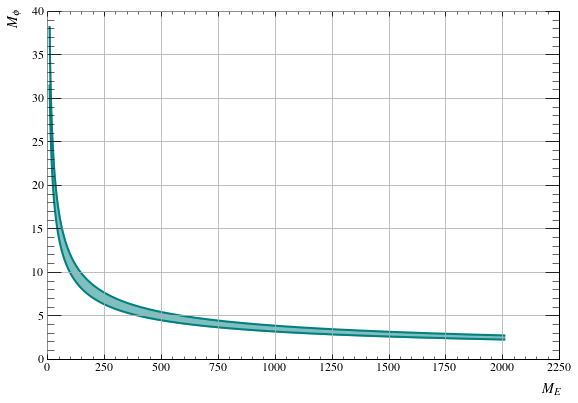

In [ ]:
mE_values_down = [point[0] for point in data_down]
M_phi_pu_values_down = [point[1] for point in data_down]
mE_values_up = [point[0] for point in data_up]
M_phi_pu_values_up = [point[1] for point in data_up]
plt.plot(mE_values_up, M_phi_pu_values_up, color='teal')
plt.plot(mE_values_down, M_phi_pu_values_down, color='teal')
plt.fill_between(mE_values_up, M_phi_pu_values_up, M_phi_pu_values_down, color='teal', alpha=0.5)
plt.xlabel(r'$M_{E}$')
plt.ylabel(r'$M_{\phi}$')
#plt.yscale('log')
#plt.xscale('log')
plt.grid(True)
plt.legend() 
plt.show()


In [12]:
import numpy as np
from scipy.integrate import quad
import csv

m_mu = 0.105  # Muon mass
gs1 = 2
gp1 = 0
delta_a = (250 + 48) * 10**-11

def integrand(x, epsilon):

    numerator = Pm + Pp - 8 * np.pi**2 * x * delta_a * (-1 + x + epsilon**2)
    denominator = -1 + x
    return numerator / denominator

Pointsup = []

for i in range(1000):
    mE = i + 10
    epsilon = mE / m_mu
    integral, _ = quad(integrand, 0, 1, args=(epsilon,))
    M_phi2 = m_mu**2 / (8 * np.pi**2 * delta_a) * integral
    M_phi = np.sqrt(M_phi2)
    Pointsup.append([mE, M_phi])

# Export data to a TSV file
with open("/home/yoxara/smodels/PostDoc_UFABC/331Muong-2/Pointsup.tsv", 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    for row in Pointsup:
        writer.writerow(row)



ZeroDivisionError: float division by zero

In [15]:
import sympy as sp
M_phi, m_mu, delta_a, x, epsilon,mE, gs1, gp1 = sp.symbols('M_phi_p m_mu delta_a x epsilon mE gs1 gp1', real=True, positive=True)
Pp = (gs1**2 * x**2 * (1 - x + epsilon))
Pm = (gp1**2 * x**2 * (1 - x - epsilon))
Nu = Pp +Pm
Nu
Lambda = m_mu/M_phi
D = (1-x)*(1- x *Lambda**2) + (x*epsilon**2 * Lambda**2)
D
Integrand = (1/D) * Nu
Integrand
fac = Lambda**2 / (8 * sp.pi**2)
amu = fac*Integrand


Teniendo en cuenta que amu = fac*Integrand y que Integrand es una integral de x, de 0 a 1, y que amu toma valores entre (250 + 48) * 10**-11 y (250 - 48) * 10**-11, entonces: dame valores aleatorios para plotar M_phi_p vs m_E, si m_mu = 0.105, gs1 = 2
gp1 = 2, y epsilon = m_E/m_mu

m_mu**2*(gp1**2*x**2*(-epsilon - x + 1) + gs1**2*x**2*(epsilon - x + 1))/(8*pi**2*M_phi_p**2*((1 - x)*(1 - m_mu**2*x/M_phi_p**2) + epsilon**2*m_mu**2*x/M_phi_p**2))